# Data understanding

De gebruikte dataset is “Geregistreerde criminaliteit" (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83648NED/table?fromstatweb). 

De CBS data is een csv bestand, dit staat voor comma seperated values of door comma gescheide waarden in het nederlands.
De data bevat de volgende kolomen:
 - `ID` is de unieke waarde voor elke row.
 - `Soort misdrijf` geeft aan welke om wat voor misdrijf het gaat.
 - `Perioden` geeft de periode aan waarin de misdrijven en aantal misdrijven zijn uitgevoerd.
 - `Regio's` is de regio waarin de genoemde aantal misdrijven in zijn gebeurd.
 - `Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)` is de procentuele aantal van de totaal geregistreerde misdrijven.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1.000 inwoners)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn per 1.000 inwoners.

## Beschrijven van de data

Hieronder staat een beschrijving van de data vanuit de Centraal Bureau Statistieken. Dit wordt telkens door middel van een stukje code weergegeven. 

In [81]:
import pandas as pd
import geopandas as gpd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from prep import movecol

# Dataset inlezen
file = "../../../raw-data/Veiligheid2.csv"
data_veiligheid = pd.read_csv(file, sep=";")

df = pd.DataFrame(data_veiligheid)

# Dataverkennen door dataframe te openen
data_veiligheid



,Soort misdrijf,Perioden,Regio's,Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal),"Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)",Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1 000 inwoners)
0,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0,"25,6"
1,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0,"24,6"
2,"Misdrijven, totaal",2017,Aa en Hunze,550.0,100.0,"21,7"
3,"Misdrijven, totaal",2018*,Aa en Hunze,545.0,100.0,"21,4"
4,"Misdrijven, totaal",2019*,Aa en Hunze,665.0,100.0,"26,3"
...,...,...,...,...,...,...
20650,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN
20651,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,20.0,2.0,NaN
20652,9 Misdrijven overige wetten,2017,Niet-gemeentelijk ingedeeld,30.0,2.0,NaN
20653,9 Misdrijven overige wetten,2018*,Niet-gemeentelijk ingedeeld,35.0,2.0,NaN


In [82]:
# Info over de kolommen
info_kolommen_veiligheid = data_veiligheid.info()
info_kolommen_veiligheid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20655 entries, 0 to 20654
Data columns (total 6 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   Soort misdrijf                                                                                          20655 non-null  object 
 1   Perioden                                                                                                20655 non-null  object 
 2   Regio's                                                                                                 20655 non-null  object 
 3   Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                     17199 non-null  float64
 4   Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerd

In [83]:
# Beschrijvende statistieken van de data
beschrijvende_stats_veiligheid = data_veiligheid.describe()
beschrijvende_stats_veiligheid

,Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal),"Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)"
count,17199.000000,17199.000000
mean,505.348276,22.191639
std,2620.273591,32.292904
min,0.000000,0.000000
25%,10.000000,1.000000
50%,65.000000,9.000000
75%,310.000000,20.000000
max,96185.000000,100.000000


In [84]:
# Informatie over de kolomnamen in de Dataframe
data_veiligheid.columns

Index(['Soort misdrijf', 'Perioden', 'Regio's',
       'Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)'],
      dtype='object')

In [85]:
# Controleren op nulwaarden in de dataframe
data_veiligheid.isna().sum()

Soort misdrijf                                                                                                0
Perioden                                                                                                      0
Regio's                                                                                                       0
Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                        3456
Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)     3456
Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)                   11620
dtype: int64

## Data exploratie

In [86]:
# Pairplot weergave van de data.
#sb.pairplot(data_veiligheid, kind="reg")

In [87]:
# Catplot weergave van de data.
# sb.barplot(x="Perioden", y="Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)", data=data_veiligheid, color="steelblue", errwidth=0)

In [88]:
# Alle soorten misdrijven die er minimaal 1 keer in voorkomen.
soorten_misdrijven = data_veiligheid["Soort misdrijf"].drop_duplicates()
soorten_misdrijven

0                            Misdrijven, totaal
2295                      1 Vermogensmisdrijven
4590     2 Vernielingen, misdr.openb.orde/gezag
6885          3 Gewelds- en seksuele misdrijven
9180                 4 Misdrijven WvSr (overig)
11475                      5 Verkeersmisdrijven
13770                         6 Drugsmisdrijven
16065                   7 (Vuur)wapenmisdrijven
18360               9 Misdrijven overige wetten
Name: Soort misdrijf, dtype: object

## Data Preperation

In [89]:
# Kolomnamen van de dataset wijzigen.

data_veiligheid_nieuw = data_veiligheid

data_veiligheid_nieuw.rename(columns={'Soort misdrijf':'Soort_misdrijf','Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)':'Aantal_misdrijven', 'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)':'Misdrijven_relatief(%)', 'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)':'Aantal_misdrijven(per_1000_inw)'}, inplace=True)

data_veiligheid_nieuw

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
0,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0,"25,6"
1,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0,"24,6"
2,"Misdrijven, totaal",2017,Aa en Hunze,550.0,100.0,"21,7"
3,"Misdrijven, totaal",2018*,Aa en Hunze,545.0,100.0,"21,4"
4,"Misdrijven, totaal",2019*,Aa en Hunze,665.0,100.0,"26,3"
...,...,...,...,...,...,...
20650,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN
20651,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,20.0,2.0,NaN
20652,9 Misdrijven overige wetten,2017,Niet-gemeentelijk ingedeeld,30.0,2.0,NaN
20653,9 Misdrijven overige wetten,2018*,Niet-gemeentelijk ingedeeld,35.0,2.0,NaN


In [90]:
# Controleren op nulwaarden in de dataframe
data_veiligheid_nieuw.isna().sum()

Soort_misdrijf                         0
Perioden                               0
Regio's                                0
Aantal_misdrijven                   3456
Misdrijven_relatief(%)              3456
Aantal_misdrijven(per_1000_inw)    11620
dtype: int64

In [91]:
data_veiligheid_nieuw.loc[data_veiligheid_nieuw['Aantal_misdrijven'] == 0]

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
8532,3 Gewelds- en seksuele misdrijven,2017,Rozendaal,0.0,0.0,0
8533,3 Gewelds- en seksuele misdrijven,2018*,Rozendaal,0.0,0.0,0
8534,3 Gewelds- en seksuele misdrijven,2019*,Rozendaal,0.0,0.0,0
8561,3 Gewelds- en seksuele misdrijven,2016,Schiermonnikoog,0.0,0.0,0
8562,3 Gewelds- en seksuele misdrijven,2017,Schiermonnikoog,0.0,0.0,0
...,...,...,...,...,...,...
20617,9 Misdrijven overige wetten,2017,Zuidhorn,0.0,0.0,0
20624,9 Misdrijven overige wetten,2019*,Zuidplas,0.0,0.0,0
20635,9 Misdrijven overige wetten,2015,Zwartewaterland,0.0,0.0,0
20636,9 Misdrijven overige wetten,2016,Zwartewaterland,0.0,0.0,0


In [92]:
#nieuwe dataset inladen voor mergen dataset, zodat regio's ook provincie er achter heeft staan.

file = "../../../raw-data/gemeenten-provincie.xlsx"
postcode = pd.read_excel(file) 

#dataframe maken van de dataset
df2 = pd.DataFrame(postcode)

#colom hernoemen
postcode.rename(columns={"Gemeente":"Regio's"}, inplace=True)

#dataframe opnieuw defineren
df2 = pd.DataFrame(postcode)

#mergen van 2 dataset op basis van regio's colomn
data_veiligheid_incl_provincie = data_veiligheid_nieuw.merge(df2, on="Regio's")

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw),Provincie
0,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0,"25,6",Drenthe
1,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0,"24,6",Drenthe
2,"Misdrijven, totaal",2017,Aa en Hunze,550.0,100.0,"21,7",Drenthe
3,"Misdrijven, totaal",2018*,Aa en Hunze,545.0,100.0,"21,4",Drenthe
4,"Misdrijven, totaal",2019*,Aa en Hunze,665.0,100.0,"26,3",Drenthe
...,...,...,...,...,...,...,...
20650,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN,Overig
20651,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,20.0,2.0,NaN,Overig
20652,9 Misdrijven overige wetten,2017,Niet-gemeentelijk ingedeeld,30.0,2.0,NaN,Overig
20653,9 Misdrijven overige wetten,2018*,Niet-gemeentelijk ingedeeld,35.0,2.0,NaN,Overig


In [93]:
data_veiligheid_incl_provincie = movecol(data_veiligheid_incl_provincie, cols_to_move=['Provincie'], ref_col="Regio's", place='After')

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
0,"Misdrijven, totaal",2015,Aa en Hunze,Drenthe,645.0,100.0,"25,6"
1,"Misdrijven, totaal",2016,Aa en Hunze,Drenthe,620.0,100.0,"24,6"
2,"Misdrijven, totaal",2017,Aa en Hunze,Drenthe,550.0,100.0,"21,7"
3,"Misdrijven, totaal",2018*,Aa en Hunze,Drenthe,545.0,100.0,"21,4"
4,"Misdrijven, totaal",2019*,Aa en Hunze,Drenthe,665.0,100.0,"26,3"
...,...,...,...,...,...,...,...
20650,9 Misdrijven overige wetten,2015,Niet-gemeentelijk ingedeeld,Overig,25.0,1.0,NaN
20651,9 Misdrijven overige wetten,2016,Niet-gemeentelijk ingedeeld,Overig,20.0,2.0,NaN
20652,9 Misdrijven overige wetten,2017,Niet-gemeentelijk ingedeeld,Overig,30.0,2.0,NaN
20653,9 Misdrijven overige wetten,2018*,Niet-gemeentelijk ingedeeld,Overig,35.0,2.0,NaN


In [94]:
# Alle Gemeentelijke records groeperen in de bijbehorende Provincie

provincies = sorted(data_veiligheid_incl_provincie["Provincie"].drop_duplicates())

provincies

['Drenthe',
 'Flevoland',
 'Friesland',
 'Gelderland',
 'Groningen',
 'Limburg',
 'Noord-Brabant',
 'Noord-Holland',
 'Overig',
 'Overijssel',
 'Utrecht',
 'Zeeland',
 'Zuid-Holland']

In [95]:
# TOTAAL AANTAL MISDRIJVEN PER JAAR PER PROVINCIE. RELATIEVE KOLOM IS NIET VAN TOEPASSING AANGEZIEN TOTALEN GEBASEERD IS OP 100%.
pd.set_option('display.max_rows', 50)

data_voorspelling_totaal = data_veiligheid_incl_provincie.loc[((data_veiligheid_incl_provincie.Soort_misdrijf == 'Misdrijven, totaal'))]

totaal_provincie_perjaar = data_voorspelling_totaal.groupby(['Provincie', 'Perioden']).sum()

totaal_misdrijven_pv_jaar = totaal_provincie_perjaar.drop(columns=['Misdrijven_relatief(%)'])

totaal_misdrijven_pv_jaar


Aantal_misdrijven
Provincie    Perioden                   
Drenthe      2015                20090.0
             2016                18665.0
             2017                16470.0
             2018*               15670.0
             2019*               17070.0
...                                  ...
Zuid-Holland 2015               224965.0
             2016               218570.0
             2017               197610.0
             2018*              181485.0
             2019*              189490.0

[65 rows x 1 columns]

In [96]:
data_voorspelling_groupby = data_voorspelling_totaal.groupby(['Perioden', "Regio's"]).sum()
np.set_printoptions(threshold=np.inf)

min_max_scaler = preprocessing.MinMaxScaler()

aantal_misdrijven_minmax = min_max_scaler.fit_transform(data_voorspelling_totaal[["Aantal_misdrijven"]])
data_voorspelling_groupby["Aantal_misdrijven_genormaliseerd"] = aantal_misdrijven_minmax

data_voorspelling_groupby

Aantal_misdrijven  Misdrijven_relatief(%)  \
Perioden Regio's                                                               
2015     's-Gravenhage (gemeente)            45920.0                   100.0   
         's-Hertogenbosch                    11485.0                   100.0   
         Aa en Hunze                           645.0                   100.0   
         Aalburg                               385.0                   100.0   
         Aalsmeer                             1100.0                   100.0   
...                                              ...                     ...   
2019*    Zutphen                              2630.0                   100.0   
         Zwartewaterland                       480.0                   100.0   
         Zwijndrecht                          1740.0                   100.0   
         Zwolle                               6440.0                   100.0   
         het Bildt                               0.0                     0.0   

                                   Aantal_misdrijven_genormaliseerd  
Perioden Regio's                                                     
2015     's-Gravenhage (gemeente)                          0.006396  
         's-Hertogenbosch                                  0.006136  
         Aa en Hunze                                       0.005408  
         Aalburg                                           0.005356  
         Aalsmeer                                          0.006604  
...                                                             ...  
2019*    Zutphen                                           0.017004  
         Zwartewaterland                                   0.011492  
         Zwijndrecht                                       0.016744  
         Zwolle                                            0.017940  
         het Bildt                                         0.019188  

[2295 rows x 3 columns]

In [97]:
data_voorspelling_groupby.describe()

,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd
count,2295.000000,2295.000000,1911.000000
mean,1893.642702,83.267974,0.023339
std,5718.959442,37.334291,0.064459
min,0.000000,0.000000,0.000000
25%,325.000000,100.000000,0.005356
50%,755.000000,100.000000,0.009048
75%,1502.500000,100.000000,0.017680
max,96185.000000,100.000000,1.000000


In [98]:
m1 = data_voorspelling_groupby['Aantal_misdrijven_genormaliseerd'] < 0.005357
m2 = data_voorspelling_groupby['Aantal_misdrijven_genormaliseerd'] > 0.017679

data_voorspelling_groupby['Aantal_misdrijven_geklasseerd'] = np.select([m1,m2], ['Laag','Hoog'], default='Middel')

data_voorspelling_groupby

Aantal_misdrijven  Misdrijven_relatief(%)  \
Perioden Regio's                                                               
2015     's-Gravenhage (gemeente)            45920.0                   100.0   
         's-Hertogenbosch                    11485.0                   100.0   
         Aa en Hunze                           645.0                   100.0   
         Aalburg                               385.0                   100.0   
         Aalsmeer                             1100.0                   100.0   
...                                              ...                     ...   
2019*    Zutphen                              2630.0                   100.0   
         Zwartewaterland                       480.0                   100.0   
         Zwijndrecht                          1740.0                   100.0   
         Zwolle                               6440.0                   100.0   
         het Bildt                               0.0                     0.0   

                                   Aantal_misdrijven_genormaliseerd  \
Perioden Regio's                                                      
2015     's-Gravenhage (gemeente)                          0.006396   
         's-Hertogenbosch                                  0.006136   
         Aa en Hunze                                       0.005408   
         Aalburg                                           0.005356   
         Aalsmeer                                          0.006604   
...                                                             ...   
2019*    Zutphen                                           0.017004   
         Zwartewaterland                                   0.011492   
         Zwijndrecht                                       0.016744   
         Zwolle                                            0.017940   
         het Bildt                                         0.019188   

                                  Aantal_misdrijven_geklasseerd  
Perioden Regio's                                                 
2015     's-Gravenhage (gemeente)                        Middel  
         's-Hertogenbosch                                Middel  
         Aa en Hunze                                     Middel  
         Aalburg                                           Laag  
         Aalsmeer                                        Middel  
...                                                         ...  
2019*    Zutphen                                         Middel  
         Zwartewaterland                                 Middel  
         Zwijndrecht                                     Middel  
         Zwolle                                            Hoog  
         het Bildt                                         Hoog  

[2295 rows x 4 columns]

In [99]:
misdrijven_df = data_voorspelling_groupby.reset_index()
misdrijven_df

,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd,Aantal_misdrijven_geklasseerd
0,2015,'s-Gravenhage (gemeente),45920.0,100.0,0.006396,Middel
1,2015,'s-Hertogenbosch,11485.0,100.0,0.006136,Middel
2,2015,Aa en Hunze,645.0,100.0,0.005408,Middel
3,2015,Aalburg,385.0,100.0,0.005356,Laag
4,2015,Aalsmeer,1100.0,100.0,0.006604,Middel
...,...,...,...,...,...,...
2290,2019*,Zutphen,2630.0,100.0,0.017004,Middel
2291,2019*,Zwartewaterland,480.0,100.0,0.011492,Middel
2292,2019*,Zwijndrecht,1740.0,100.0,0.016744,Middel
2293,2019*,Zwolle,6440.0,100.0,0.017940,Hoog


In [100]:
soort_misdrijf = data_veiligheid_incl_provincie.drop(columns=['Perioden', 'Provincie',
       'Aantal_misdrijven', 'Misdrijven_relatief(%)',
       'Aantal_misdrijven(per_1000_inw)'])

soort_misdrijf

,Soort_misdrijf,Regio's
0,"Misdrijven, totaal",Aa en Hunze
1,"Misdrijven, totaal",Aa en Hunze
2,"Misdrijven, totaal",Aa en Hunze
3,"Misdrijven, totaal",Aa en Hunze
4,"Misdrijven, totaal",Aa en Hunze
...,...,...
20650,9 Misdrijven overige wetten,Niet-gemeentelijk ingedeeld
20651,9 Misdrijven overige wetten,Niet-gemeentelijk ingedeeld
20652,9 Misdrijven overige wetten,Niet-gemeentelijk ingedeeld
20653,9 Misdrijven overige wetten,Niet-gemeentelijk ingedeeld


In [101]:
misdrijven_df = misdrijven_df.merge(soort_misdrijf, on="Regio's")
misdrijven_df = movecol(misdrijven_df, cols_to_move=['Soort_misdrijf'], ref_col="Regio's", place='After')

In [102]:
#PER PERIODE/JAAR EEN OVERZICHT VAN ALLE SOORTEN MISDRIJVEN EN WAT HET RELATIEF IS VAN HET TOTAAL. REGIO IS GEKOZEN DOOR INPUT
pd.set_option('display.max_rows', 50)
misdrijven_df.drop(columns=["Misdrijven_relatief(%)"])

gemeente = input('Voer hier een gemeente in')

soortmisdrijf_regio_perjaar = misdrijven_df.loc[((misdrijven_df["Regio's"] == gemeente) | (misdrijven_df["Perioden"] == gemeente))]

soortmisdrijf_regio_perjaar

,Perioden,Regio's,Soort_misdrijf,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd,Aantal_misdrijven_geklasseerd


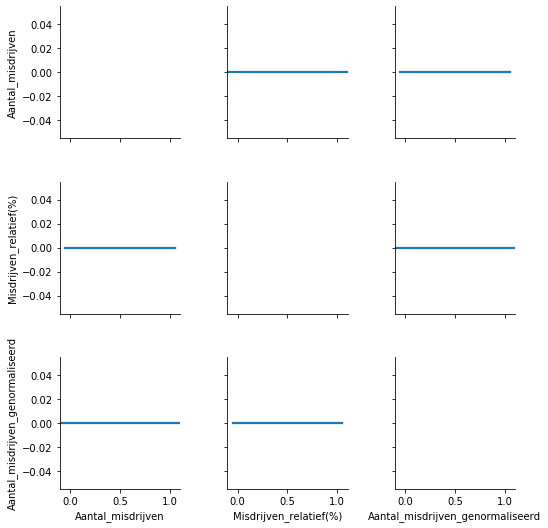

In [103]:
sb.pairplot(soortmisdrijf_regio_perjaar.groupby(["Perioden", "Soort_misdrijf"]).sum(), kind="reg")

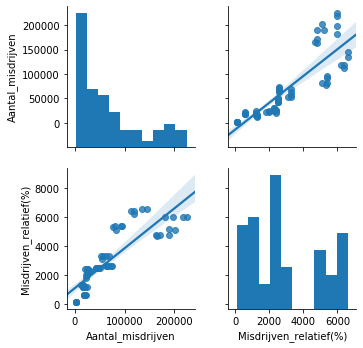

In [104]:
sb.pairplot(totaal_provincie_perjaar, kind="reg")

In [105]:
misdrijven_df

,Perioden,Regio's,Soort_misdrijf,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd,Aantal_misdrijven_geklasseerd
0,2015,'s-Gravenhage (gemeente),"Misdrijven, totaal",45920.0,100.0,0.006396,Middel
1,2015,'s-Gravenhage (gemeente),"Misdrijven, totaal",45920.0,100.0,0.006396,Middel
2,2015,'s-Gravenhage (gemeente),"Misdrijven, totaal",45920.0,100.0,0.006396,Middel
3,2015,'s-Gravenhage (gemeente),"Misdrijven, totaal",45920.0,100.0,0.006396,Middel
4,2015,'s-Gravenhage (gemeente),"Misdrijven, totaal",45920.0,100.0,0.006396,Middel
...,...,...,...,...,...,...,...
103270,2019*,het Bildt,9 Misdrijven overige wetten,0.0,0.0,0.019188,Hoog
103271,2019*,het Bildt,9 Misdrijven overige wetten,0.0,0.0,0.019188,Hoog
103272,2019*,het Bildt,9 Misdrijven overige wetten,0.0,0.0,0.019188,Hoog
103273,2019*,het Bildt,9 Misdrijven overige wetten,0.0,0.0,0.019188,Hoog


In [110]:
misdrijven_df["Soort_misdrijf"].unique()

array(['Misdrijven, totaal', '1 Vermogensmisdrijven',
       '2 Vernielingen, misdr.openb.orde/gezag',
       '3 Gewelds- en seksuele misdrijven', '4 Misdrijven WvSr (overig)',
       '5 Verkeersmisdrijven', '6 Drugsmisdrijven',
       '7 (Vuur)wapenmisdrijven', '9 Misdrijven overige wetten'],
      dtype=object)